# MNIST Handwritten Digit Recognition in PyTorch

# 1. Import Module

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from torch.utils.data import DataLoader

from torchvision import datasets, transforms


# 2. Import Data

In [34]:
batch_size_train = 64
batch_size_test = 1000

random_seed = 2022
#cuDNN uses nondeterministic algorithms which can be disabled
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [28]:
# 4. Setup data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) #global mean = 0.1307 and standard deviation = 0.3081  of the MNIST dataset
])
train_dataset = datasets.MNIST('./data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

test_dataset = datasets.MNIST('./data', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size_train, shuffle=True)

n_total_steps = len(train_loader)

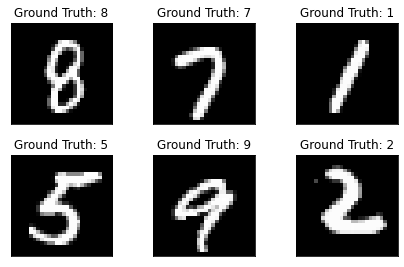

In [31]:
import matplotlib.pyplot as plt

examples = iter(test_loader)
example_data, example_targets = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

# 2. Training

In [32]:
# 1. Build a computation graph
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = F.max_pool2d(x, 1)
        
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        output = F.log_softmax(x) #normalizes all of the values in a vector, so that the values sum to 1.
        return output


In [35]:
#learning_rate and momentum are hyperparameters for the optimizer
n_epochs = 4
learning_rate = 0.01
momentum = 0.5

In [38]:
model = ConvNet()
criterion = nn.NLLLoss() #negative log likelihood
optimizer = optim.SGD(model.parameters(), 
                      lr=learning_rate,
                      momentum=momentum)

In [ ]:

  
    
    
    
    
        output = model(data)
        loss = criterion(output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (i+1)%5000 == 0:
      print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i+1}/ {n_total_steps}], Loss: {loss.item():.4f}")
      torch.save(model.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [ ]:
def train(model, train_loader, criterion, optimizer, nepochs):
    train_losses, train_counter = [], []
    for batch_idx, (inputs, target) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%5000 == 0:
            print(f"Epoch [{epoch}], Step [{i+1}/ {n_total_steps}], Loss: {loss.item():.4f}")

    torch.save(model.state_dict(), '/results/model.pth')
    torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [18]:
# 5. Train the model
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):

       

 
        
        

Epoch [1/4], Step [2000/ 15000], Loss: 2.1434
Epoch [1/4], Step [4000/ 15000], Loss: 2.0339
Epoch [1/4], Step [6000/ 15000], Loss: 1.9574
Epoch [1/4], Step [8000/ 15000], Loss: 1.8335
Epoch [1/4], Step [10000/ 15000], Loss: 1.8662
Epoch [1/4], Step [12000/ 15000], Loss: 0.9262
Epoch [1/4], Step [14000/ 15000], Loss: 0.9609
Epoch [2/4], Step [2000/ 15000], Loss: 0.4449
Epoch [2/4], Step [4000/ 15000], Loss: 0.5042
Epoch [2/4], Step [6000/ 15000], Loss: 0.6619
Epoch [2/4], Step [8000/ 15000], Loss: 0.8652
Epoch [2/4], Step [10000/ 15000], Loss: 1.2647
Epoch [2/4], Step [12000/ 15000], Loss: 0.3718
Epoch [2/4], Step [14000/ 15000], Loss: 0.6373
Epoch [3/4], Step [2000/ 15000], Loss: 0.1224
Epoch [3/4], Step [4000/ 15000], Loss: 0.1661
Epoch [3/4], Step [6000/ 15000], Loss: 0.4187
Epoch [3/4], Step [8000/ 15000], Loss: 0.6744
Epoch [3/4], Step [10000/ 15000], Loss: 1.1539
Epoch [3/4], Step [12000/ 15000], Loss: 0.2607
Epoch [3/4], Step [14000/ 15000], Loss: 0.6926
Epoch [4/4], Step [2000/ 

In [21]:
# print('Finished Training')
FILE = './model/mnist.pth'
# torch.save(model.state_dict(), FILE)


model = ConvNet()
model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself

<All keys matched successfully>